# Programa de capacitação

**Sistemas ópticos coerentes**

Adolfo Fernandes Herbster

Essentials of Signal Processing

<a href="https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/" target="_blank">https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/</a>

<a href="mailto:adolfofh@dee.ufcg.edu.br">adolfofh@dee.ufcg.edu.br</a>

Embedded/DEE/CEEI/UFCG - 2019

# Signals

## Sinusoidal signals

In [3]:
%matplotlib inline
import numpy as num
import matplotlib.pyplot as plt

f = 10; # Frequência do sinal - 10 ciclos por segundo -> 10 Hz
overSampRate = 32; 
fs = overSampRate * f; # Frequência de amostragem do sinal -> 15 amostras por ciclo. 
nCyl = 5; # Número de ciclos
t = num.arange(0,nCyl*(1/f)-(1/fs),1/fs);
g = num.sin(2 * num.pi * f * t);

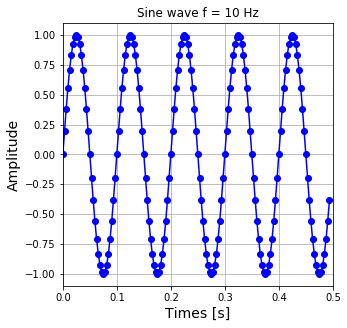

In [4]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.figure();
plt.plot(t, g, 'bo-');
plt.xlim(0,0.5);
plt.title("Sine wave f = 10 Hz");
plt.xlabel("Times [s]", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)
plt.grid(True);

## Square wave
A true square wave can be simply generated by applying signum function over a periodic function
\begin{equation}
    g(t) = sgn\left[ \sin(2 \pi f t) \right]
\end{equation}
where
\begin{equation}
sgn(x) =
\begin{cases}
-1, \, \text { if } x < 0, \\
 0, \, \text { if } x < 0, \\
 1, \, \text { if } x < 0.
\end{cases}
\end{equation}

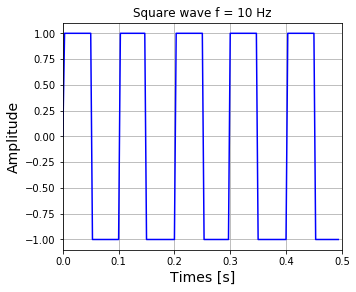

In [5]:
g = num.sign(num.sin(2 * num.pi * f * t));
plt.figure();
plt.plot(t, g, 'b-')
plt.xlim(0,0.5);
plt.title("Square wave f = 10 Hz");
plt.xlabel("Times [s]", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25)
plt.grid(True);
#plt.figure();
#plt.plot(t, (g+1)/2, 'b-');

## Rectangular pulse
An isolated rectangular pulse of amplitude $A$ and duration $T$ is represented mathematically as
\begin{equation}
    g(t) = A \cdot rect\left(\frac{t}{T}\right)
\end{equation}
where
\begin{equation}
rect(x) =
\begin{cases}
1,  \, \text { if } |x| < 1/2, \\
1/2,\, \text { if } |x| = 1/2, \\
0,  \, \text { if } |x| > 1/2.
\end{cases}
\end{equation}

In [6]:
fs = 500; # Número de amostras - qual o significado de 1/fs?
T = 0.2;  # Período do pulso
t = num.arange(-0.5,0.5,1/fs);
g = (t > -T/2) * (t < T/2) + 0.5 * (t == T/2) + 0.5 * (t == -T/2)

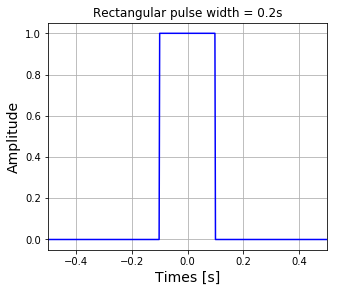

In [7]:
plt.figure();
plt.plot(t, g, 'b-')
plt.xlim(-0.5,0.5);
plt.title("Rectangular pulse width = 0.2s");
plt.xlabel("Times [s]", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25);
plt.grid(True);

## Gaussian pulse
The impulse response of a Gaussian Filter is written as a Gaussian function as follows
\begin{equation}
    g(t) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{r^2}{2\sigma^2}}.
\end{equation}

In [10]:
fs = 80; # Número de amostras.
sigma = 0.1; 
t = num.arange(-0.5,0.5,1/fs);
g = 1/(num.sqrt(2*num.pi)*sigma)*num.exp(-(t**2)/(2*sigma**2));

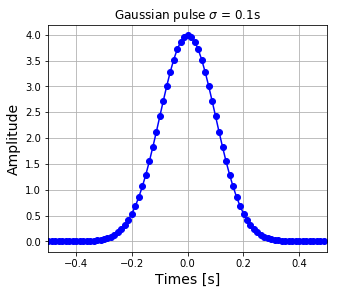

In [11]:
plt.figure();
plt.plot(t, g, 'bo-');
plt.xlim(-0.5,0.5);
plt.title("Gaussian pulse $\sigma$ = 0.1s");
plt.xlabel("Times [s]", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25)
plt.grid(True);

## Chirp signal
THe equation for generating a sinusidal (cosine here) signal with amplitude $A$, angular frequency $\omega_0$ and initial phase $\phi$ is
\begin{equation}
    x(t) = A \cos(2 \pi f(t) t + \phi_0),
\end{equation}
where, the time-varying frequency function is given by
\begin{equation}
    f(t) = \frac{k}{2}t + f_0,
\end{equation}
and
\begin{equation}
    k = \frac{f_1 - f_0}{T}.
\end{equation}

In [12]:
fs = 500; # Sampling frequency
t = num.arange(0,1,1/fs);
f0 = 1;  # 1 Hz at 0s.
f1 = 25; # 25 Hz at 1s.
t0 = 0;
T = 1 - t0; # period
k = (f1 - f0)/T;
g = num.cos(2*num.pi*(k/2*t+f0)*t);

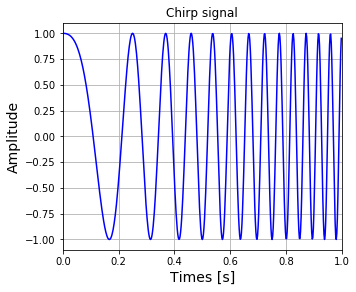

In [9]:
plt.figure();
plt.plot(t, g, 'b-');
plt.xlim(0,1);
plt.title("Chirp signal");
plt.xlabel("Times [s]", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.25)
plt.grid(True);

In [19]:
f = 10; # Frequência do sinal - 10 ciclos por segundo -> 10 Hz
overSampRate = 16; 
fs = overSampRate * f; # Frequência de amostragem do sinal -> 15 amostras por ciclo. 
nCyl = 5; # Número de ciclos por segundo -> menor frequência
t = num.arange(0,nCyl*(1/f)-(1/fs),1/fs);
# Sinal com múltiplas frequências!
gm = num.sin(2 * num.pi * f/2 * t) + num.sin(2 * num.pi * f * t) + 0.5*num.sin(2 * num.pi * (2 * f) * t);

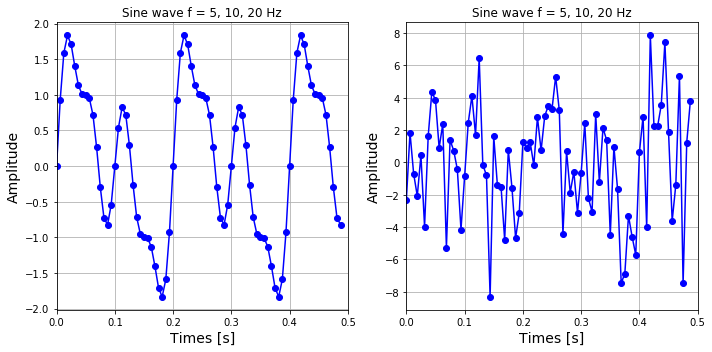

In [20]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(121);
plt.plot(t, gm, 'bo-');
plt.xlim(0,0.5);
plt.title("Sine wave f = 5, 10, 20 Hz");
plt.xlabel("Times [s]", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)
plt.grid(True);
plt.subplot(122);
sigma = 3.0;
mean  = 0.0;
gm_noise = gm + sigma * num.random.randn(len(gm)) + mean;
plt.plot(t, gm_noise, 'bo-');
plt.xlim(0,0.5);
plt.title("Sine wave f = 5, 10, 20 Hz");
plt.xlabel("Times [s]", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)
plt.grid(True);
plt.tight_layout();

In [21]:
N = 256;
X = num.fft.fft(gm, N);
df = fs/N;                       # frequency resolution
sampleIndex = num.arange(0,N); # raw index for FFT plot
fv  = sampleIndex * df;
len(gm_noise)

79

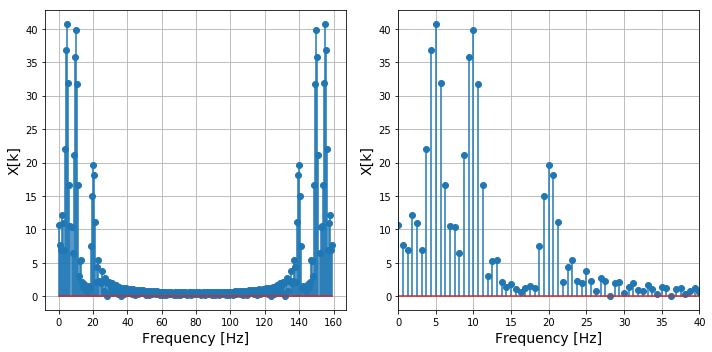

In [22]:
plt.subplot(121);
plt.stem(fv, num.abs(X));
plt.xlabel("Frequency [Hz]",    fontsize = 14);
plt.ylabel("X[k]", fontsize = 14);
plt.grid(True);
plt.subplot(122);
plt.stem(fv, num.abs(X));
plt.xlabel("Frequency [Hz]",    fontsize = 14);
plt.ylabel("X[k]", fontsize = 14);
plt.xlim(0, 40)
plt.grid(True);
plt.tight_layout();

## Fourier transform
### Problem:
Convert a time domain signal to frequency domain and viceversa.
### Solution:
Fourier Transform is an excellent tool to achieve this conversion and is ubiquitously used in many
applications.
### Characteristics:
In signal processing , a time domain signal can be continuous or discrete and it can be aperiodic or periodic.

| Transform | Nature of time domain signal | Nature of frequency spectrum |
|---------------------------|--------------------------|-------------------------|
| Fourier Transform (FT)    | continuous, non-periodic | non-periodic,continuous |
| Discrete-time Fourier Transform (DTFT) | discrete, non-periodic | periodic,continuous |
| Fourier Series (FS)   | continuous, periodic | non-periodic, discrete |
| Discrete Fourier Transform (DFT)    | discrete, periodic | periodic,discrete |

## Basic properties of the Fourier Transform

The Fourier Transform is a linear operation, i.e. it does not matter if you perform scaling and summation of two functions before or after Fourier Transform. Let $x(t)$ and $y(t)$ be two signals. Then the following holds:

\begin{align}
\mathcal{F}\{x(t)\} &= X(f) \\
\mathcal{F}\{y(t)\} &= Y(f) \\
\mathcal{F}\{ax(t)+by(t)\} &= aX(f)+bY(f) \\
\end{align}

Let us verify this operation numerically by calculating the Fourier transform of a the sum of a rect plus a Gaussian:

In [23]:
def ft(samples, Fs, t0):
    """Approximate the Fourier Transform of a time-limited signal 
    by means of the discrete Fourier Transform.
    
    samples: signal values sampled at the positions t0 + n/Fs
    Fs: Sampling frequency of the signal
    t0: starting time of the sampling of the signal
    """
    f = num.linspace(-Fs/2, Fs/2, len(samples), endpoint=False)
    return num.fft.fftshift(num.fft.fft(samples)/Fs * num.exp(-2j*num.pi*f*t0))

In [27]:
def rect(t):
    return (abs(t) <= 0.5).astype(float)
def gauss(t):
    return num.exp(-t*t)
def triang(t):
    return (1-abs(t)) * rect(t/2)


tstart = 10
Fs = 1000
t = num.arange(-tstart, tstart, 1/Fs)
f = num.arange(-Fs/2, Fs/2, Fs/len(t))

x = rect
y = gauss
X = ft(x(t), Fs, -tstart)
Y = ft(y(t), Fs, -tstart)

def showLinearity(a):
    plt.gcf().clear();
    plt.subplot(221)
    plt.plot(t, x(t), label='$x(t)$')
    plt.plot(t, y(t), label='$y(t)$')
    plt.grid(True)
    plt.ylim((-0.1, 1.1))
    plt.legend(fontsize=10)
    plt.xlabel('$t$')

    plt.subplot(222)
    plt.plot(f, X.real, label='$X(f)$')
    plt.plot(f, Y.real, label='$Y(f)$')
    plt.xlim((-3,3))
    plt.grid(True)
    plt.legend(fontsize=10)
    plt.xlabel('$f$')
    
    xplusay = lambda t: x(t) + a*y(t)
    XplusaY = ft(xplusay(t), Fs, -t0)
    plt.subplot(223)
    plt.plot(t, xplusay(t), '-*', label='$x(t)+ay(t)$', markevery=400)
    plt.plot(t, x(t), label='$x(t)$')
    plt.plot(t, a*y(t), label='$ay(t)$')
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.ylim((-2, 2))
    plt.xlabel('$t$')
    plt.text(5, 1, "a=%.2f" % a, bbox=dict(edgecolor='black', facecolor='white'))
    
    plt.subplot(224)
    plt.plot(f, XplusaY.real, '-*', label='$X(f)+aY(f)$', markevery=10)
    plt.plot(f, X.real, label='$X(f)$')
    plt.plot(f, a*Y.real, label='$aY(f)$')
    plt.xlim((-3,3))
    plt.grid(True)
    plt.ylim((-3, 5))
    plt.xlabel('$f$')
    plt.legend(fontsize=10)
    showInInteract()

In [28]:
from ipywidgets import interact
def showInInteract():
    import inspect
    for i in range(5):
        if 'interaction.py' in inspect.stack()[i][1]: plt.show()

As visible, the Fourier Transform of a linear combination of two input signals is the same linear combination of the Fourier Transforms of the input signal.

In [29]:
plt.figure(figsize=(8,6))
interact(showLinearity, a=(-1, 2.));

<Figure size 576x432 with 0 Axes>

interactive(children=(FloatSlider(value=0.5, description='a', max=2.0, min=-1.0), Output()), _dom_classes=('wi…

## Time-shifting property of the Fourier Transform

The time-shifting property means that a shift in time corresponds to a phase rotation in the frequency domain:

$$\mathcal{F}\{x(t-t_0)\} = \exp(-j2\pi ft_0)X(f). $$

Let us verify this property numerically with the code below. For example, see that for a time-shift of 1s, in the spectrum the phase rotates by one full period every Hz.

In [30]:
x = rect
X = ft(x(t), Fs, -tstart)

def showShift(t0):
    plt.gcf().clear();
    
    plt.subplot(121)
    plt.plot(t, x(t), label='$x(t)$')
    plt.plot(t, x(t-t0), label='$x(t-t_0)$')
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.ylim((-0.1, 1.1))
    plt.xlabel('$t$')
    plt.text(5, 0.9, r"$t_0$=%.2f" % t0, bbox=dict(facecolor='white', edgecolor='black'))
    

    plt.subplot(122)
    Xt0 = ft(x(t-t0), Fs, -tstart)
    plt.plot(f, X.real, label='Re $X(f)$')
    plt.plot(f, Xt0.real, label='Re $X_{t_0}(f)$')
    plt.plot(f, Xt0.imag, label='Im $X_{t_0}(f)$')
    plt.xlim((-3, 3))
    plt.xlabel('$f$')
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.ylim((-1.1,1.1));
    showInInteract()

In [31]:
plt.figure(figsize=(8,3))
interact(showShift, t0=(-2.0, 2.0));

<Figure size 576x216 with 0 Axes>

interactive(children=(FloatSlider(value=0.0, description='t0', max=2.0, min=-2.0), Output()), _dom_classes=('w…

## Modulation / Frequency Shifting property of the Fourier Transform

Modulation means multiplying a signal with a complex exponential. In the Fourier Transform, modulating a signal in time domain corresponds to shifting it in the frequency domain. As such, it is the counterpart of shifting in the time domain (which corresponds to modulation in frequency domain). Mathematically, we have

$$
\mathcal{F}\{\exp(j2\pi f_0t)x(t)\} = X(f-f_0).
$$

Let us verify this property numerically. For example, when the signal is multiplied with a complex exponential of 1Hz frequency, the corresponding spectrum of the signal is shifted by 1Hz. 

In [32]:
x = gauss
X = ft(x(t), Fs, -tstart)

def showModulation(f0):
    plt.gcf().clear()
    
    xf0 = lambda t: num.exp(2j*num.pi*f0*t) * x(t)
    
    plt.subplot(121)
    plt.plot(t, x(t), label='$x(t)$')
    plt.plot(t, xf0(t).real, label=r'Re $\exp(j2\pi f_0t)x(t)$')
    plt.plot(t, xf0(t).imag, label=r'Im $\exp(j2\pi f_0t)x(t)$')
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.ylim((-1.1, 1.1))
    plt.xlim((-2.5, 4.5))
    plt.xlabel('$t$')
    plt.text(3, 0.6, "$f_0$=%.2f" % f0, bbox=dict(edgecolor='black', facecolor='white'))

    plt.subplot(122)
    Xf0 = ft(xf0(t), Fs, -tstart)
    plt.plot(f, X.real, label='Re $X(f)$')
    plt.plot(f, Xf0.real, label='Re $X(f-f_0)$')
    plt.xlim((-3, 3))
    plt.legend(fontsize=10, loc='upper left')
    plt.grid(True)
    plt.ylim((-.1,2.1))
    plt.xlabel('$f$')
    showInInteract()

See, how a multiplication with a complex exponential in the time domain corresponds to a shift in the frequency domain. In particular, if we multiply the time domain with a complex exponential with a period of $1s$, then the shift in frequency domain amounts 1Hz.

In [33]:
plt.figure(figsize=(8,3))
interact(showModulation, f0=(-2.0, 2.0));

<Figure size 576x216 with 0 Axes>

interactive(children=(FloatSlider(value=0.0, description='f0', max=2.0, min=-2.0), Output()), _dom_classes=('w…